In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('zhengqi_train.txt', sep='\t')
test = pd.read_csv('zhengqi_test.txt', sep='\t')

x_train = train.loc[:,'V0':'V37']
y_train = train['target']

先查看train和test的相同特征的分布是否相同。将分布差别很大的特征删去。

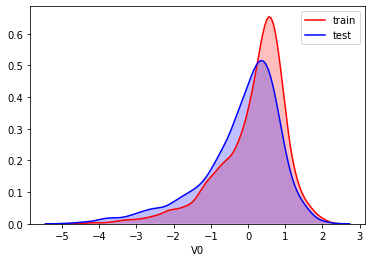

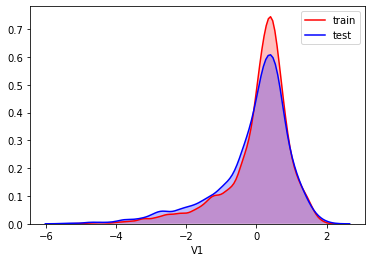

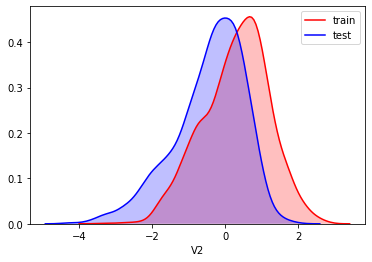

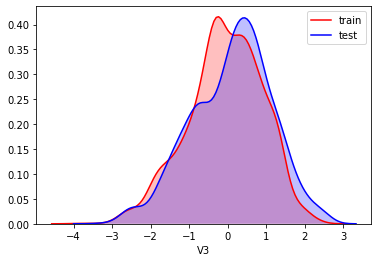

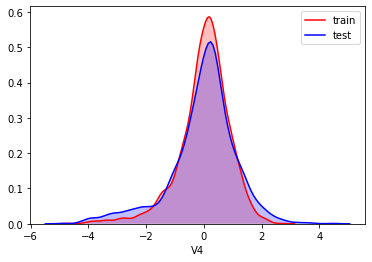

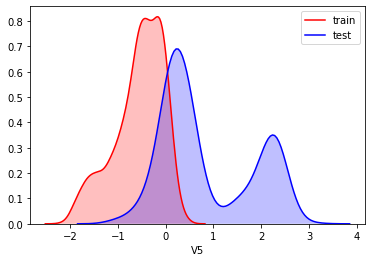

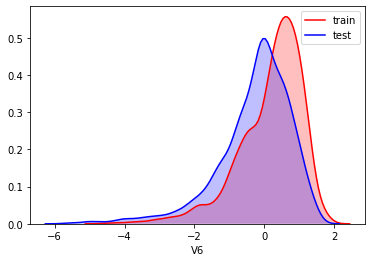

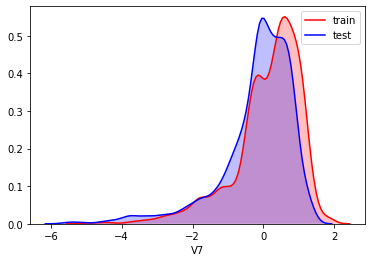

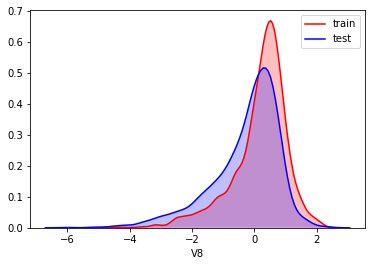

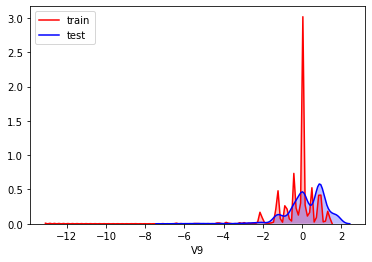

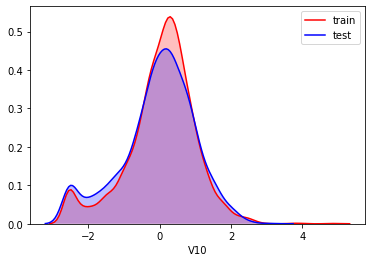

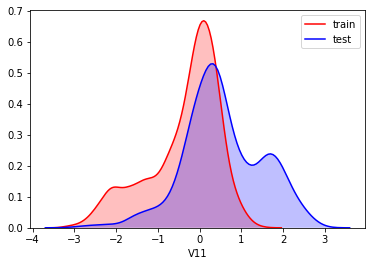

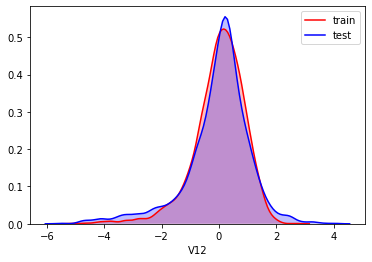

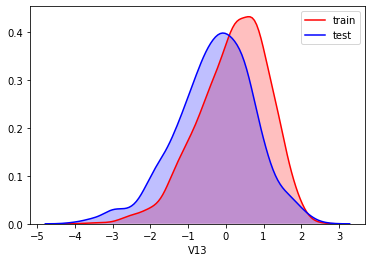

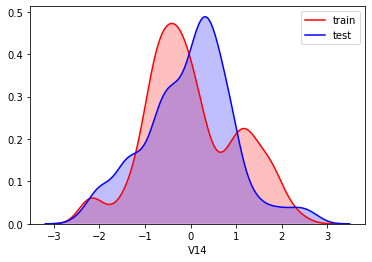

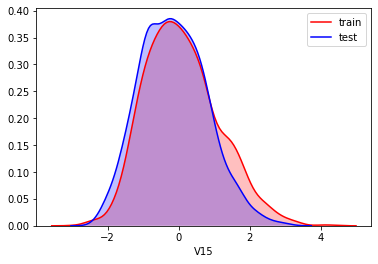

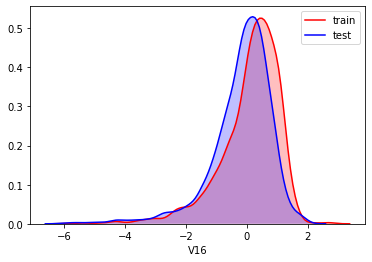

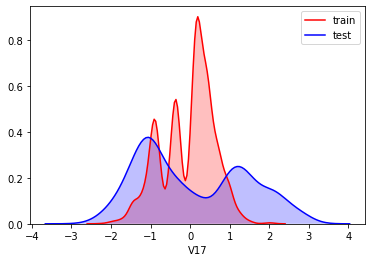

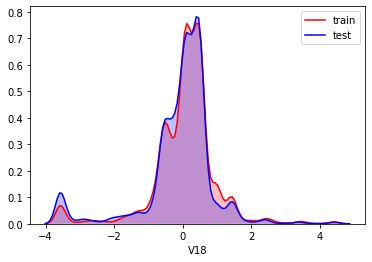

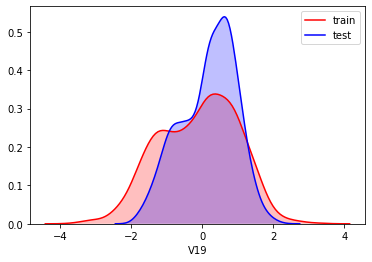

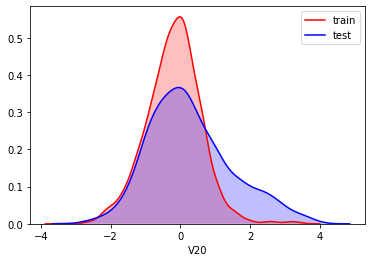

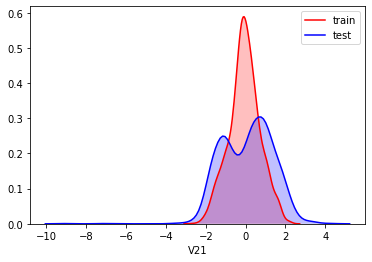

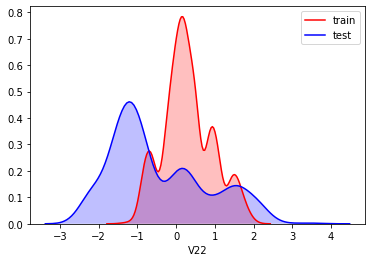

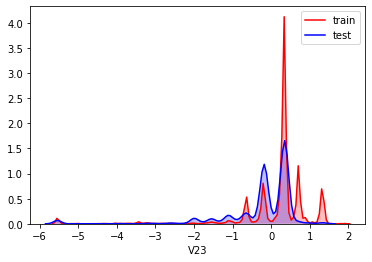

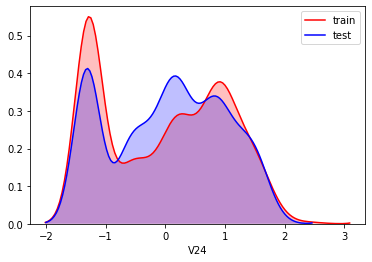

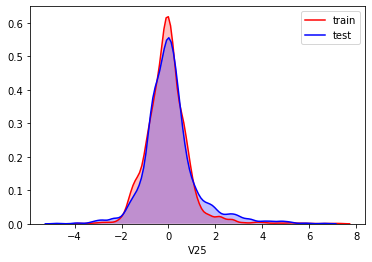

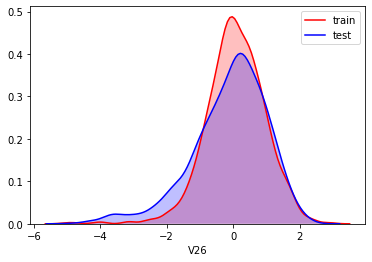

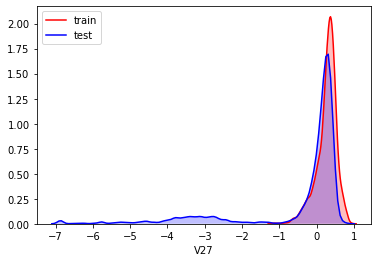

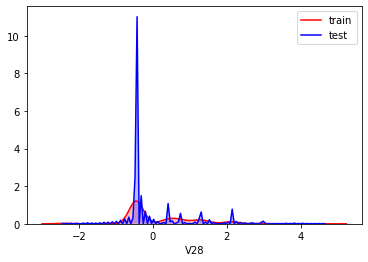

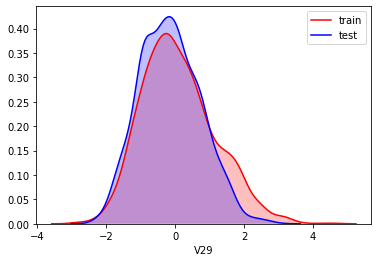

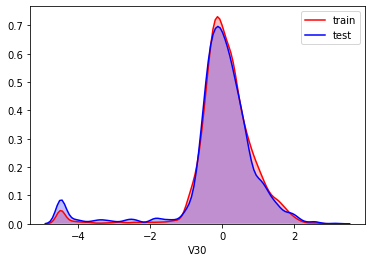

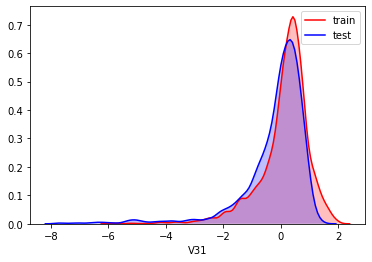

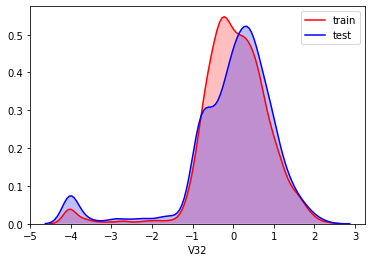

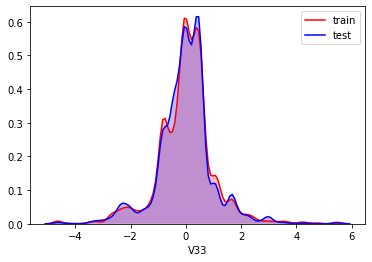

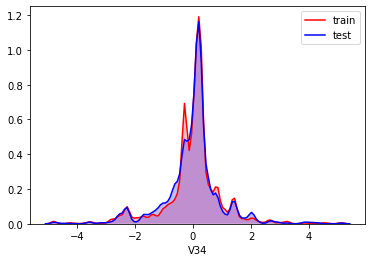

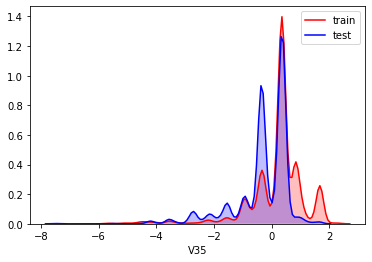

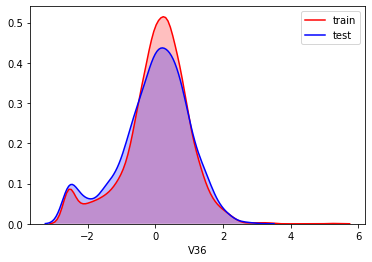

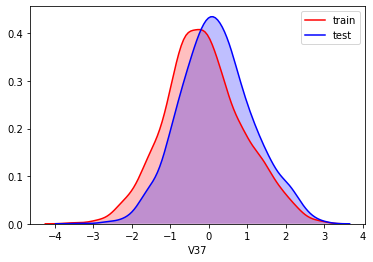

In [2]:
for col in x_train.columns:
    g=sns.kdeplot(x_train[col], color='red', shade=True)
    g=sns.kdeplot(test[col],ax=g, color='blue', shade=True)
    g.set_xlabel(col)
    g=g.legend(['train','test'])
    plt.show()

可以看到train和test分布很不一样的有5，9，11，17，22，28

再在看看target的特征分布以及是否有比较异常的值。

最低的十个值： [[-3.22257359]
 [-3.20631004]
 [-3.20224416]
 [-3.1829312 ]
 [-3.17886531]
 [-3.17175001]
 [-3.13414056]
 [-3.12397584]
 [-3.11279466]
 [-3.10161347]]
最高的十个值： [[1.99090919]
 [2.00513979]
 [2.04681513]
 [2.04986454]
 [2.1230505 ]
 [2.16472583]
 [2.25620828]
 [2.35277308]
 [2.41579432]
 [2.45137082]]


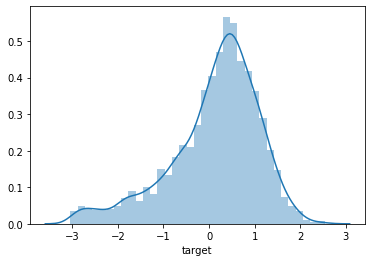

In [3]:
sns.distplot(y_train)

from sklearn.preprocessing import StandardScaler

sc_y = StandardScaler().fit_transform(y_train[:,np.newaxis])
lower = sc_y[sc_y[:,0].argsort()][:10]
high= sc_y[sc_y[:,0].argsort()][-10:]
print('最低的十个值：',lower)
print('最高的十个值：',high)

没有特别异常的值。

接下来看看变量的相关性。

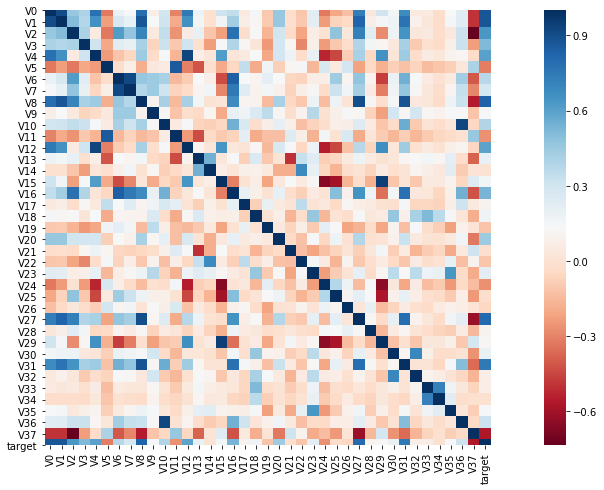

In [4]:
fig, ax = plt.subplots(1,1,figsize=(19,8))
sns.heatmap(train.corr(), square=True, cmap=plt.cm.RdBu)

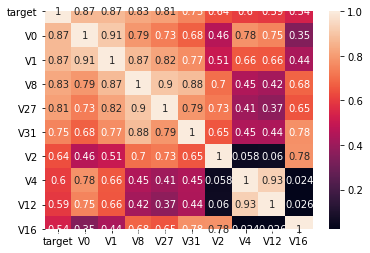

In [5]:
#抽取10个最大的变量看看
cols=train.corr().nlargest(10,'target')['target'].index
corr_matrix=train[cols].corr()
sns.heatmap(corr_matrix, annot=True)

可以看到与target的相关性绝对值：

<0.2: V9,V13,V14,V15,V17,V18,V19,V21,V22,V25,V26,V28,V29,V30,V32,V33,V34,V35   18个

<0.15:V9,   V14,V15,V17,   V19,V21,V22,V25,V26,V28,V29,   V32,V33,V34,V35   15个 

<0.1:      V14,   V17,      V21,   V25,V26,V28,      V32,V33,V34      9个

比较高的有：V0,V1,V8,V27,V31

彼此相关性比较高(>0.9)的有：

V0,V1

V6,V7

V4,V12

V8,V27

V10,V36

V15,V29

V14,V17,V21,V25,V26,V28,V32,V33,V34  可以考虑删去。

不过数据中的特征不是很多，也可以不删除，都可以试试。

最终尝试结果选择不删

考虑到工业上很多都是单位化的量，所以要考虑二次项。